In [1]:
import requests as rq
from bs4 import BeautifulSoup as bs
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
url = rq.get('https://www2.2019seagames.com/countries/')
data = bs(url.content, 'html.parser')

countryTempList = []
countryList2017 = []
count = 0

for i in data.find_all('em'):
    if count % 6 == 0 and count != 0:
        countryList2017.append(countryTempList)
        countryTempList = []
        countryTempList.append(i.text)
        count += 1
    else:
        countryTempList.append(i.text)
        count += 1

countryList2017 = countryList2017[:11]
countryList2017[3][0] = "LAO PDR"
countryList2017.sort()
countryList2017

[['BRUNEI DARUSALLAM',
  'Total: 14',
  'Gold: 0',
  'Silver: 5',
  'Bronze: 9',
  'First Joined: 1977'],
 ['CAMBODIA',
  'Total: 17',
  'Gold: 3',
  'Silver: 2',
  'Bronze: 12',
  'First Joined: 1961'],
 ['INDONESIA',
  'Total: 191',
  'Gold: 38',
  'Silver: 63',
  'Bronze: 90',
  'First Joined: 1977'],
 ['LAO PDR',
  'Total: 26',
  'Gold: 2',
  'Silver: 3',
  'Bronze: 21',
  'First Joined: 1959'],
 ['MALAYSIA',
  'Total: 323',
  'Gold: 145',
  'Silver: 92',
  'Bronze: 86',
  'First Joined: 1959'],
 ['MYANMAR',
  'Total: 37',
  'Gold: 7',
  'Silver: 10',
  'Bronze: 20',
  'First Joined: 1959'],
 ['PHILIPPINES',
  'Total: 121',
  'Gold: 24',
  'Silver: 33',
  'Bronze: 64',
  'First Joined: 1977'],
 ['SINGAPORE',
  'Total: 188',
  'Gold: 57',
  'Silver: 58',
  'Bronze: 73',
  'First Joined: 1959'],
 ['THAILAND',
  'Total: 246',
  'Gold: 72',
  'Silver: 86',
  'Bronze: 88',
  'First Joined: 1959'],
 ['TIMOR LESTE',
  'Total: 3',
  'Gold: 0',
  'Silver: 0',
  'Bronze: 3',
  'First Joined:

In [3]:
newCountryList = []
for i in countryList2017:
    currentTemp = []
    currentTemp.append(i[0])
    totalTempValue = i[1].split()
    currentTemp.append(int(totalTempValue[1]))
    goldTempValue = i[2].split()
    currentTemp.append(int(goldTempValue[1]))
    silverTempValue = i[3].split()
    currentTemp.append(int(silverTempValue[1]))
    bronzeTempValue = i[4].split()
    currentTemp.append(int(bronzeTempValue[1]))
#     yearJoin  = i[5].split()
#     currentTemp.append(yearJoin[2])

    newCountryList.append(currentTemp)

newCountryList[0][0] = 'BRUNEI'

In [4]:
countryList2019 = []
countryTempList = []
count = 0

url2 = rq.get('https://rs.2019seagames.com/RS2019/mobiapp/MedalTally')
data2 = bs(url2.content, 'html.parser')
for i in data2.find_all('small'):
    if count % 5 == 0 and count != 0:
        countryList2019.append(countryTempList)
        countryTempList = []
        countryTempList.append(i.text)
        count += 1
    else:
        countryTempList.append(i.text)
        count += 1

timorLeste2019 = ['TIMOR LESTE', 0, 0, 0, 0]
countryList2019.append(timorLeste2019)
countryList2019 = countryList2019[1:]
countryList2019.sort()

for i in range(len(countryList2019)):
    for j in range(1, len(countryList2019[i])):
        countryList2019[i][j] = int(countryList2019[i][j])
        
countryList2019[0][0] = 'BRUNEI'

In [5]:
countryList = []
for i in range(len(countryList2019)):
    countryList.append(countryList2019[i][0])
countryList.sort()
countryList[0] = 'BRUNEI'

In [6]:
sea_malaysia = pd.DataFrame(newCountryList, columns=['Country', 'Total Medal', 'Gold', 'Silver', 'Bronze'])
sea_malaysia

,Country,Total Medal,Gold,Silver,Bronze
0,BRUNEI,14,0,5,9
1,CAMBODIA,17,3,2,12
2,INDONESIA,191,38,63,90
3,LAO PDR,26,2,3,21
4,MALAYSIA,323,145,92,86
5,MYANMAR,37,7,10,20
6,PHILIPPINES,121,24,33,64
7,SINGAPORE,188,57,58,73
8,THAILAND,246,72,86,88
9,TIMOR LESTE,3,0,0,3


In [7]:
sea_phillipines = pd.DataFrame(countryList2019, columns=['Country', 'Total Medal', 'Gold', 'Silver', 'Bronze'])
sea_phillipines

,Country,Total Medal,Gold,Silver,Bronze
0,BRUNEI,2,5,6,13
1,CAMBODIA,4,6,36,46
2,INDONESIA,72,84,111,267
3,LAO PDR,1,5,29,35
4,MALAYSIA,55,58,71,184
5,MYANMAR,4,18,51,73
6,PHILIPPINES,149,117,121,387
7,SINGAPORE,53,46,68,167
8,THAILAND,92,103,123,318
9,TIMOR LESTE,0,0,0,0


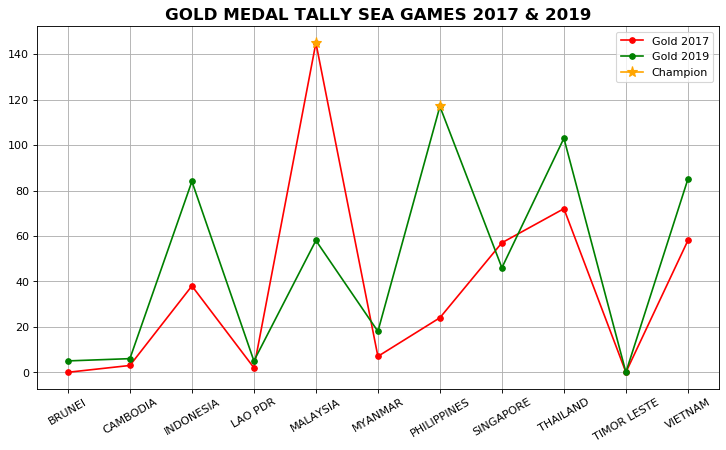

In [20]:

plt.figure(figsize = (11, 6), dpi = 80, facecolor = 'w', edgecolor = 'w')
plt.plot(countryList, sea_malaysia['Gold'], color = 'r', marker='.', markerfacecolor= 'r', markeredgecolor='r', markersize = 10)
plt.plot(countryList, sea_phillipines['Gold'], color = 'g', marker='.', markerfacecolor= 'g', markeredgecolor='g', markersize = 10)

plt.plot(sea_malaysia.Country.tolist()[4], sea_malaysia.Gold.tolist()[4], marker='*', markersize = 10, label='Champion', color='orange')
plt.plot(sea_phillipines.Country.tolist()[6], sea_phillipines.Gold.tolist()[6], marker='*', markersize = 10, label='Champion', color='orange')
plt.legend(['Gold 2017', 'Gold 2019', 'Champion'])
plt.xticks(rotation = 30)
plt.grid(True)
plt.title("GOLD MEDAL TALLY SEA GAMES 2017 & 2019", size = 15, fontweight= "bold")
plt.show()

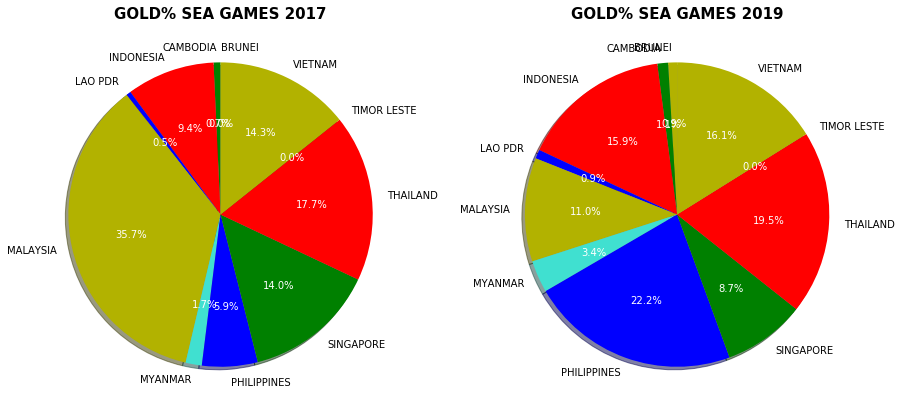

In [9]:
sea = plt.figure(figsize = (15,10))

sea.add_subplot(121)
x,y,z = plt.pie(
    sea_malaysia['Gold'], 
    labels = countryList,
    colors = ['#b2b200', 'green', 'red', 'blue', '#b2b200', 'turquoise', 'blue', 'green', 'red', 'red'],
    startangle = 90,
    radius = 1.0,
    shadow = True, 
    counterclock = True,
    textprops = { 'size' : 10, 'color' : 'k'},
    autopct = '%1.1f%%'
)
plt.title("GOLD% SEA GAMES 2017", size= 15, fontweight="bold")
for i in z:
    i.set_color('w')
    
sea.add_subplot(122)
a,b,c = plt.pie(
    sea_phillipines['Gold'], 
    labels = countryList,
    colors = ['#b2b200', 'green', 'red', 'blue', '#b2b200', 'turquoise', 'blue', 'green', 'red', 'red'],
    startangle = 90,
    radius = 1.0,
    shadow = True, 
    counterclock = True,
    textprops = { 'size' : 10, 'color' : 'k'},
    autopct = '%1.1f%%'
)
plt.title("GOLD% SEA GAMES 2019", size= 15, fontweight="bold")
for i in c:
    i.set_color('w')
plt.show()